In [19]:
# standard modules
import importlib

# PyTorch modules
import torch

# import data + model modules
import ukbb_data
import ukbb_ica_models
# in case of changes 
importlib.reload(ukbb_data)
importlib.reload(ukbb_ica_models)

# import custom functions
import utils
# in case of changes
importlib.reload(utils)

# check: is GPU available?
torch.cuda.is_available()

True

In [10]:
# prepare data paths
ukbb_dir = '/ritter/share/data/UKBB/ukb_data/'

# define logging path
path = '../tracking/ICA25/KernelSize1DCNN/'

In [11]:
utils.make_reproducible()

In [29]:
! gpustat

cuda02                      Tue Jun 27 17:17:48 2023  470.182.03
[0] NVIDIA GeForce RTX 3090 | 29'C,   1 % |  9406 / 24268 MB | tomasz(7599M) laurar(1799M) gdm(4M)
[1] NVIDIA GeForce RTX 3090 | 63'C,  90 % | 24242 / 24268 MB | sam(22907M) laurar(1327M) gdm(4M)
[2] NVIDIA GeForce RTX 3090 | 56'C,  34 % | 24248 / 24268 MB | sam(23591M) sam(649M) gdm(4M)
[3] NVIDIA GeForce RTX 3090 | 60'C,  88 % | 23599 / 24268 MB | sam(23591M) gdm(4M)


# Testing different kernel sizes for the ICA25 simple 1D CNN

In [26]:
def train_kernelsize(log_path, data_path, kernel_size, device):
    """
    Fuction for using the same model and training set-up for testing
    different kernel sizes.
    Outputs a trained model.
    Input:
        log_path: path to where logs, checkpoints and data info should be saved
        data_path: path to location where data is saved (expectations see utils.DataModule)
        kernel_size: kernel size to set on all layers, as int
        device: which GPU to run on
    Output:
        trainer: trained model
        datamodule: PyTorch Lightning UKBB DataModule
    """
    # initialise model
    variable_CNN = ukbb_ica_models.variable1DCNN(kernel_size=kernel_size)

    # initialise logger
    logger = utils.logger_init(save_dir=log_path+str(kernel_size)+'/')

    # set callbacks
    early_stopping = utils.earlystopping_init()

    checkpoint = utils.checkpoint_init(save_dir=log_path+str(kernel_size)+'/')

    # initialise trainer
    trainer = utils.trainer_init(device=device,
                                 logger=logger,
                                 callbacks=[early_stopping, checkpoint])

    # initialise DataModule
    datamodule = ukbb_data.UKBBDataModule(data_path)

    # train model
    trainer.fit(variable_CNN, datamodule=datamodule)
    print('Training complete.')

    # save info on which data was used + what the train/val/test split was
    utils.save_data_info(path=log_path+str(kernel_size)+'/', datamodule=datamodule)
    
    return trainer, datamodule

def test_kernelsize(trainer, datamodule, kernel_size):
    """
    Fuction for using the same model and testing set-up for testing
    different kernel sizes.
    Outputs test score and a plot visualising the training progression.
    Input:
        trainer: the trained model
        datamodule: PyTorch Lightning DataModule instance
        kernel_size: kernel size to set on all layers, as int
    """
    print(f'\nTesting model with kernel size {kernel_size}...')
    
    # test model
    trainer.test(ckpt_path='best', datamodule=datamodule)
    
    # visualise training
    print(f'\nVisualise training of model with kernel size {kernel_size}')    
    metrics = utils.get_current_metrics(trainer, show=True)
    utils.plot_training(data=metrics, title=f'Training visualisation of the ICA25 1D-CNN with kernel size {kernel_size}')

## kernel size = 3

In [7]:
kernelsize_3, kernelsize_3_data = train_kernelsize(path, ukbb_dir, 3, 1)

/home/laurar/anaconda3/envs/cuda02/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'activation' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['activation'])`.
  rank_zero_warn(
/home/laurar/anaconda3/envs/cuda02/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision f

Sanity Checking: 0it [00:00, ?it/s]

/home/laurar/anaconda3/envs/cuda02/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 40 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


RuntimeError: Unable to find a valid cuDNN algorithm to run convolution

In [ ]:
test_kernelsize(kernelsize_3, kernelsize_3_data, 3)

## kernel size = 5

In [27]:
kernelsize_5, kernelsize_5_data = train_kernelsize(path, ukbb_dir, 5, 0)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
/home/laurar/anaconda3/envs/cuda02/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:612: UserWarning: Checkpoint directory /home/laurar/IM/tracking/ICA25/KernelSize1DCNN/5/Checkpoint exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name    | Type       | Params
---------------------------------------
0 | act     | ReLU       | 0     
1 | loss    | 

Sanity Checking: 0it [00:00, ?it/s]

/home/laurar/anaconda3/envs/cuda02/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 40 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/laurar/anaconda3/envs/cuda02/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 40 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Training complete.


You are using a CUDA device ('NVIDIA GeForce RTX 3090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision



Testing model with kernel size 5...


Restoring states from the checkpoint path at /home/laurar/IM/tracking/ICA25/KernelSize1DCNN/5/Checkpoint/models-epoch=43-val_loss=40.67.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
Loaded model weights from the checkpoint at /home/laurar/IM/tracking/ICA25/KernelSize1DCNN/5/Checkpoint/models-epoch=43-val_loss=40.67.ckpt
/home/laurar/anaconda3/envs/cuda02/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 40 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss            35.27688980102539
        test_mae             4.732269763946533
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Visualise training of model with kernel size 5


,step,train_loss,val_loss,val_mae,test_loss,test_mae
epoch,,,,,,
0,9,987.582153,NaN,NaN,NaN,NaN
0,19,68.014191,NaN,NaN,NaN,NaN
0,29,206.310822,NaN,NaN,NaN,NaN
0,36,NaN,91.91346,7.680084,NaN,NaN
1,39,57.225578,NaN,NaN,NaN,NaN


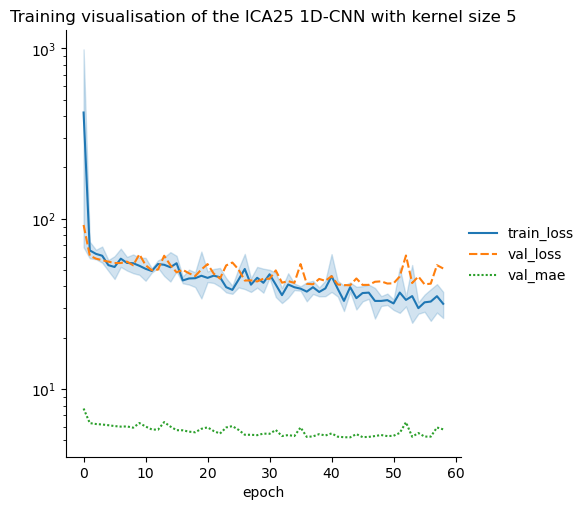

In [28]:
test_kernelsize(kernelsize_5, kernelsize_5_data, 5)

## kernel size = 7

In [ ]:
kernelsize_7, kernelsize_7_data = train_kernelsize(path, ukbb_dir, 7, 1)

In [ ]:
test_kernelsize(kernelsize_7, kernelsize_7_data, 7)

## kernel size = 10

In [ ]:
kernelsize_10, kernelsize_10_data = train_kernelsize(path, ukbb_dir, 10, 1)

In [ ]:
test_kernelsize(kernelsize_10, kernelsize_10_data, 10)

## kernel size = 15

In [ ]:
kernelsize_15, kernelsize_15_data = train_kernelsize(path, ukbb_dir, 15, 1)

In [ ]:
test_kernelsize(kernelsize_15, kernelsize_15_data, 15)